In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('tweet obama.csv')
df.head()

,created_at,text,url,replies,retweets,favorites,user
0,10/16/17 22:59,I'm grateful to @SenJohnMcCain for his lifetim...,https://twitter.com/BarackObama/status/9200615...,17064,89916,641842,BarackObama
1,10/2/17 12:41,Michelle &amp; I are praying for the victims i...,https://twitter.com/BarackObama/status/9148326...,21588,405895,1715753,BarackObama
2,9/30/17 2:22,Proud to cheer on Team USA at the Invictus Gam...,https://twitter.com/BarackObama/status/9139520...,8476,60651,503255,BarackObama
3,9/26/17 17:03,We're expanding our efforts to help Puerto Ric...,https://twitter.com/BarackObama/status/9127244...,10657,113807,334901,BarackObama
4,9/25/17 23:36,"Prosecutor, soldier, family man, citizen. Beau...",https://twitter.com/BarackObama/status/9124608...,3886,58449,328106,BarackObama


### Data Preprocessing

In [113]:
# drop unnecessary columns

df = df.drop(['created_at', 'url', 'user', 'replies', 'retweets', 'favorites'], axis=1)
df.head()

,text
0,I'm grateful to @SenJohnMcCain for his lifetim...
1,Michelle &amp; I are praying for the victims i...
2,Proud to cheer on Team USA at the Invictus Gam...
3,We're expanding our efforts to help Puerto Ric...
4,"Prosecutor, soldier, family man, citizen. Beau..."


In [114]:
# check null values

df.isnull().sum()

text    0
dtype: int64

In [115]:
df.shape

(3207, 1)

### Data Cleaning

In [120]:
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords

def clean_text(text):
  
    text = re.sub(r'http\S+', '', text)  # URL
    text = re.sub(r'@\w+', '', text)  # Mentions
    if re.search(r'<[^>]+>', text):
        text = BeautifulSoup(text, 'html.parser').get_text()  # HTML tags
    text = re.sub(r'\[.*?\]|\{.*?\}', '', text) # Brackets
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Special character & Punctuation
    
    text = text.lower() # Convert lowercase
    
    tokens = nltk.word_tokenize(text) # tokenize text
    
    
    # Remove stopwords 
    # Normally using stopwords only deletes all the default stopwords.
    # But here I need to remove some stopwords besides the default words. So I have to use custom stopwords.
    
    stop_words = set(stopwords.words('english'))
    custom_stopwords = set(['https', 'http'])  # custom stopwords 
    filtered_tokens = [word for word in tokens if word not in stop_words and word not in custom_stopwords]
    
    # join 
    cleaned_text = ' '.join(filtered_tokens)
    return cleaned_text

# Apply the cleaning function
df['cleaned_text'] = df['text'].apply(clean_text)

In [121]:
df.head()

,text,cleaned_text
0,I'm grateful to @SenJohnMcCain for his lifetim...,im grateful lifetime service country congratul...
1,Michelle &amp; I are praying for the victims i...,michelle amp praying victims las vegas thought...
2,Proud to cheer on Team USA at the Invictus Gam...,proud cheer team usa invictus games today frie...
3,We're expanding our efforts to help Puerto Ric...,expanding efforts help puerto rico amp usvi fe...
4,"Prosecutor, soldier, family man, citizen. Beau...",prosecutor soldier family man citizen beau mad...


### Tokenize the data

In [122]:
from nltk.tokenize import word_tokenize

df['tokenize_text'] = df['cleaned_text'].apply(word_tokenize)

### Remove infrequent words

infrequent or rare words are noisy. They don't contain valuable information.

In [123]:
# we convert tokenize col to string and keep only those words which are bigger than double (2) length

df['rmv_infrequent'] = df['tokenize_text'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
df.head()

,text,cleaned_text,tokenize_text,rmv_infrequent
0,I'm grateful to @SenJohnMcCain for his lifetim...,im grateful lifetime service country congratul...,"[im, grateful, lifetime, service, country, con...",grateful lifetime service country congratulati...
1,Michelle &amp; I are praying for the victims i...,michelle amp praying victims las vegas thought...,"[michelle, amp, praying, victims, las, vegas, ...",michelle amp praying victims las vegas thought...
2,Proud to cheer on Team USA at the Invictus Gam...,proud cheer team usa invictus games today frie...,"[proud, cheer, team, usa, invictus, games, tod...",proud cheer team usa invictus games today frie...
3,We're expanding our efforts to help Puerto Ric...,expanding efforts help puerto rico amp usvi fe...,"[expanding, efforts, help, puerto, rico, amp, ...",expanding efforts help puerto rico amp usvi fe...
4,"Prosecutor, soldier, family man, citizen. Beau...",prosecutor soldier family man citizen beau mad...,"[prosecutor, soldier, family, man, citizen, be...",prosecutor soldier family man citizen beau mad...


In [124]:
# after remove rare or infrequent words, join all the words

all_words = ' '.join([word for word in df['rmv_infrequent']])

### Frequency Distribution

In [131]:
from nltk.probability import FreqDist


tokenize = nltk.tokenize.word_tokenize(all_words)
frequency_distribution = FreqDist(tokenize)

frequency_distribution

FreqDist({'president': 1209, 'obama': 1069, 'actonclimate': 294, 'change': 215, 'watch': 207, 'climate': 201, 'time': 171, 'health': 170, 'americans': 158, 'today': 155, ...})

In [132]:
# Most common words 
frequency_distribution.most_common(10)

[('president', 1209),
 ('obama', 1069),
 ('actonclimate', 294),
 ('change', 215),
 ('watch', 207),
 ('climate', 201),
 ('time', 171),
 ('health', 170),
 ('americans', 158),
 ('today', 155)]

In [133]:
# frequency distribution returns a dictionary form.
# Using frequency distribution we can see how many times a word appears. 
# At the same time, we will drop the words that come less than a certain number.

In [134]:
df['drop_words'] = df['tokenize_text'].apply(lambda x: ' '.join(word for word in x if frequency[word]>3))

In [135]:
df.head(3)

,text,cleaned_text,tokenize_text,rmv_infrequent,drop_words
0,I'm grateful to @SenJohnMcCain for his lifetim...,im grateful lifetime service country congratul...,"[im, grateful, lifetime, service, country, con...",grateful lifetime service country congratulati...,grateful service country congratulations john ...
1,Michelle &amp; I are praying for the victims i...,michelle amp praying victims las vegas thought...,"[michelle, amp, praying, victims, las, vegas, ...",michelle amp praying victims las vegas thought...,michelle amp victims thoughts families amp eve...
2,Proud to cheer on Team USA at the Invictus Gam...,proud cheer team usa invictus games today frie...,"[proud, cheer, team, usa, invictus, games, tod...",proud cheer team usa invictus games today frie...,proud team games today friend joe best country
3,We're expanding our efforts to help Puerto Ric...,expanding efforts help puerto rico amp usvi fe...,"[expanding, efforts, help, puerto, rico, amp, ...",expanding efforts help puerto rico amp usvi fe...,expanding efforts help amp fellow americans ne...
4,"Prosecutor, soldier, family man, citizen. Beau...",prosecutor soldier family man citizen beau mad...,"[prosecutor, soldier, family, man, citizen, be...",prosecutor soldier family man citizen beau mad...,family man citizen beau made want better legac...


### Normalize text
Now we have to normalize our text using NLP techniques. In this case we can use 'Lemmatization'

In [136]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

df['lemmatize_words'] = df['drop_words'].apply(lemma.lemmatize)
df.head(3)

,text,cleaned_text,tokenize_text,rmv_infrequent,drop_words,lemmatize_words
0,I'm grateful to @SenJohnMcCain for his lifetim...,im grateful lifetime service country congratul...,"[im, grateful, lifetime, service, country, con...",grateful lifetime service country congratulati...,grateful service country congratulations john ...,grateful service country congratulations john ...
1,Michelle &amp; I are praying for the victims i...,michelle amp praying victims las vegas thought...,"[michelle, amp, praying, victims, las, vegas, ...",michelle amp praying victims las vegas thought...,michelle amp victims thoughts families amp eve...,michelle amp victims thoughts families amp eve...
2,Proud to cheer on Team USA at the Invictus Gam...,proud cheer team usa invictus games today frie...,"[proud, cheer, team, usa, invictus, games, tod...",proud cheer team usa invictus games today frie...,proud team games today friend joe best country,proud team games today friend joe best country
3,We're expanding our efforts to help Puerto Ric...,expanding efforts help puerto rico amp usvi fe...,"[expanding, efforts, help, puerto, rico, amp, ...",expanding efforts help puerto rico amp usvi fe...,expanding efforts help amp fellow americans ne...,expanding efforts help amp fellow americans ne...
4,"Prosecutor, soldier, family man, citizen. Beau...",prosecutor soldier family man citizen beau mad...,"[prosecutor, soldier, family, man, citizen, be...",prosecutor soldier family man citizen beau mad...,family man citizen beau made want better legac...,family man citizen beau made want better legac...


### Sentiment Analyzer

We will use the Sentiment Intensity Analyser which uses the "VADER Lexicon". 

VADER is a rule-based sentiment analysis tool. 

VADER calculates text emotions and determines whether the text is positive, neutral or, negative. 

It's calculates text sentiment and produces four different classes of output scores: positive, negative, neutral, and compound.

In [137]:
from nltk.sentiment import SentimentIntensityAnalyzer

sentiment_analyzer = SentimentIntensityAnalyzer()

df['polarity'] = df['lemmatize_words'].apply(lambda x: sentiment_analyzer.polarity_scores(x))
df.head()

,text,cleaned_text,tokenize_text,rmv_infrequent,drop_words,lemmatize_words,polarity
0,I'm grateful to @SenJohnMcCain for his lifetim...,im grateful lifetime service country congratul...,"[im, grateful, lifetime, service, country, con...",grateful lifetime service country congratulati...,grateful service country congratulations john ...,grateful service country congratulations john ...,"{'neg': 0.0, 'neu': 0.367, 'pos': 0.633, 'comp..."
1,Michelle &amp; I are praying for the victims i...,michelle amp praying victims las vegas thought...,"[michelle, amp, praying, victims, las, vegas, ...",michelle amp praying victims las vegas thought...,michelle amp victims thoughts families amp eve...,michelle amp victims thoughts families amp eve...,"{'neg': 0.247, 'neu': 0.753, 'pos': 0.0, 'comp..."
2,Proud to cheer on Team USA at the Invictus Gam...,proud cheer team usa invictus games today frie...,"[proud, cheer, team, usa, invictus, games, tod...",proud cheer team usa invictus games today frie...,proud team games today friend joe best country,proud team games today friend joe best country,"{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp..."
3,We're expanding our efforts to help Puerto Ric...,expanding efforts help puerto rico amp usvi fe...,"[expanding, efforts, help, puerto, rico, amp, ...",expanding efforts help puerto rico amp usvi fe...,expanding efforts help amp fellow americans ne...,expanding efforts help amp fellow americans ne...,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp..."
4,"Prosecutor, soldier, family man, citizen. Beau...",prosecutor soldier family man citizen beau mad...,"[prosecutor, soldier, family, man, citizen, be...",prosecutor soldier family man citizen beau mad...,family man citizen beau made want better legac...,family man citizen beau made want better legac...,"{'neg': 0.105, 'neu': 0.526, 'pos': 0.368, 'co..."


In [138]:
# Transform the data

df = pd.concat([df, df['polarity'].apply(pd.Series)], axis=1)

# Drop the original 'polarity' column
df = df.drop('polarity', axis=1)

In [139]:
df.head()

,text,cleaned_text,tokenize_text,rmv_infrequent,drop_words,lemmatize_words,neg,neu,pos,compound
0,I'm grateful to @SenJohnMcCain for his lifetim...,im grateful lifetime service country congratul...,"[im, grateful, lifetime, service, country, con...",grateful lifetime service country congratulati...,grateful service country congratulations john ...,grateful service country congratulations john ...,0.000,0.367,0.633,0.7845
1,Michelle &amp; I are praying for the victims i...,michelle amp praying victims las vegas thought...,"[michelle, amp, praying, victims, las, vegas, ...",michelle amp praying victims las vegas thought...,michelle amp victims thoughts families amp eve...,michelle amp victims thoughts families amp eve...,0.247,0.753,0.000,-0.3182
2,Proud to cheer on Team USA at the Invictus Gam...,proud cheer team usa invictus games today frie...,"[proud, cheer, team, usa, invictus, games, tod...",proud cheer team usa invictus games today frie...,proud team games today friend joe best country,proud team games today friend joe best country,0.000,0.323,0.677,0.8885
3,We're expanding our efforts to help Puerto Ric...,expanding efforts help puerto rico amp usvi fe...,"[expanding, efforts, help, puerto, rico, amp, ...",expanding efforts help puerto rico amp usvi fe...,expanding efforts help amp fellow americans ne...,expanding efforts help amp fellow americans ne...,0.000,0.588,0.412,0.5994
4,"Prosecutor, soldier, family man, citizen. Beau...",prosecutor soldier family man citizen beau mad...,"[prosecutor, soldier, family, man, citizen, be...",prosecutor soldier family man citizen beau mad...,family man citizen beau made want better legac...,family man citizen beau made want better legac...,0.105,0.526,0.368,0.4588


In [140]:
# Now make a new column based on compound and find out Positive, Negative or Neutral

df['sentiment'] = df['compound'].apply(lambda x: 'Positive' if x>0 else 'Negative' if x<0 else 'Neutral')
df.head()

,text,cleaned_text,tokenize_text,rmv_infrequent,drop_words,lemmatize_words,neg,neu,pos,compound,sentiment
0,I'm grateful to @SenJohnMcCain for his lifetim...,im grateful lifetime service country congratul...,"[im, grateful, lifetime, service, country, con...",grateful lifetime service country congratulati...,grateful service country congratulations john ...,grateful service country congratulations john ...,0.000,0.367,0.633,0.7845,Positive
1,Michelle &amp; I are praying for the victims i...,michelle amp praying victims las vegas thought...,"[michelle, amp, praying, victims, las, vegas, ...",michelle amp praying victims las vegas thought...,michelle amp victims thoughts families amp eve...,michelle amp victims thoughts families amp eve...,0.247,0.753,0.000,-0.3182,Negative
2,Proud to cheer on Team USA at the Invictus Gam...,proud cheer team usa invictus games today frie...,"[proud, cheer, team, usa, invictus, games, tod...",proud cheer team usa invictus games today frie...,proud team games today friend joe best country,proud team games today friend joe best country,0.000,0.323,0.677,0.8885,Positive
3,We're expanding our efforts to help Puerto Ric...,expanding efforts help puerto rico amp usvi fe...,"[expanding, efforts, help, puerto, rico, amp, ...",expanding efforts help puerto rico amp usvi fe...,expanding efforts help amp fellow americans ne...,expanding efforts help amp fellow americans ne...,0.000,0.588,0.412,0.5994,Positive
4,"Prosecutor, soldier, family man, citizen. Beau...",prosecutor soldier family man citizen beau mad...,"[prosecutor, soldier, family, man, citizen, be...",prosecutor soldier family man citizen beau mad...,family man citizen beau made want better legac...,family man citizen beau made want better legac...,0.105,0.526,0.368,0.4588,Positive


In [141]:
# Checking and counts sentiments

df['sentiment'].value_counts()

Positive    1695
Neutral     1089
Negative     423
Name: sentiment, dtype: int64

### Visualize each Sentiment

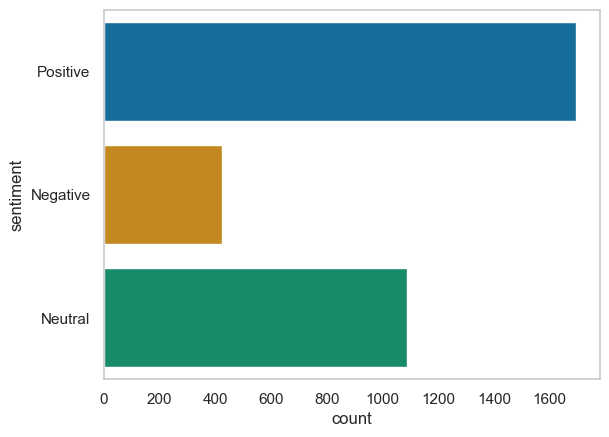

In [142]:
# using barplot

bar_color = sns.color_palette("colorblind", len(common_word))

ax = sns.countplot(y='sentiment', data=df, palette=bar_color)
ax.xaxis.grid(False)

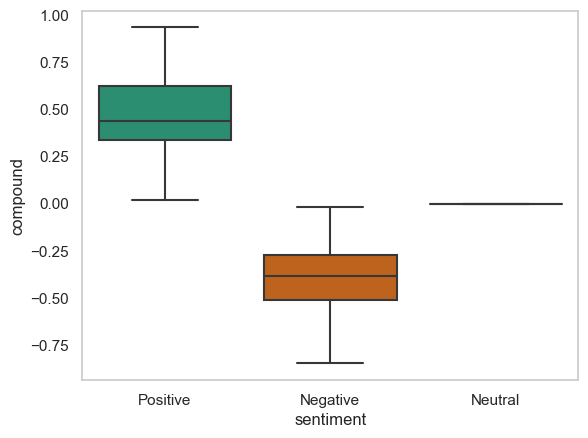

In [143]:
# using boxplot

bar_color = sns.color_palette("Dark2", len(common_word))

ax = sns.boxplot(y='compound', x='sentiment', data=df, palette=bar_color)
ax.yaxis.grid(False)

#### Most common words

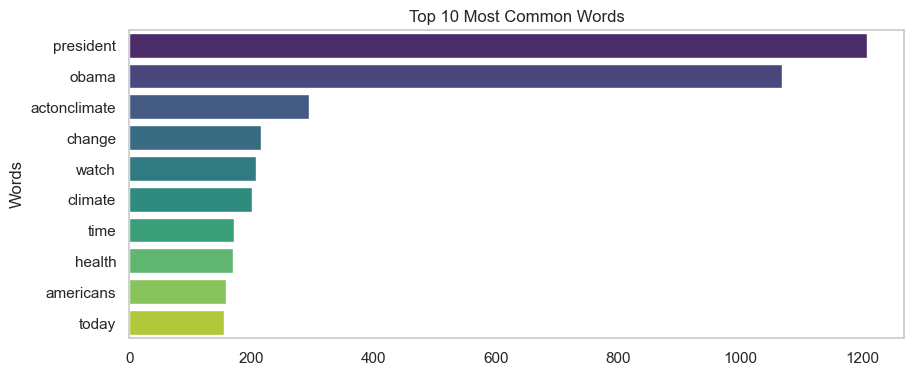

In [144]:
top_words = frequency.most_common(10)

# g
words = []
counts = []
for word, count in top_words:
    words.append(word)
    counts.append(count)

bar_color = sns.color_palette("viridis", len(common_word))
    
plt.figure(figsize=(10, 4))
ax = sns.barplot(x=counts, y=words, palette = bar_color)
plt.ylabel('Words')
plt.title('Top 10 Most Common Words')
ax.xaxis.grid(False) 

plt.show()

#### Visualize all the words 

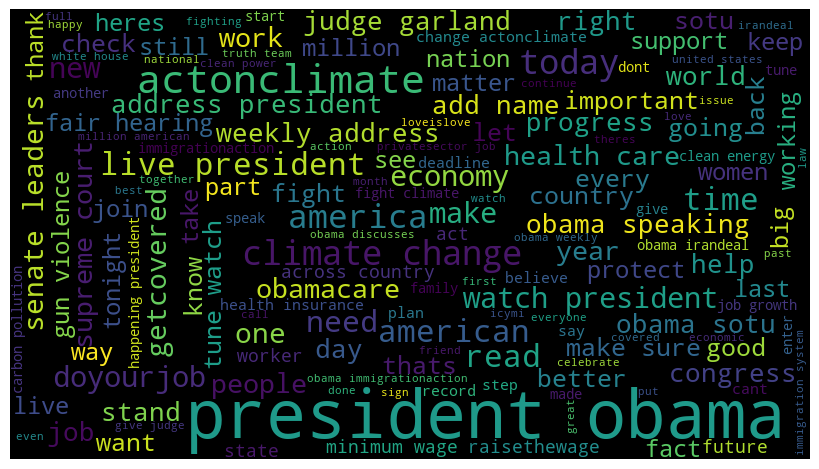

In [145]:
import wordcloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=450, background_color='black', max_words=150).generate(all_words)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [151]:
# top ten words using plotly

import plotly.express as pe
words, counts = zip(*top_words)
fig = pe.bar(y=counts, x=words)
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})
fig.show()